## Alinhamento múltiplo e filogenia

In [1]:
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Seq import Seq
from Bio import AlignIO
from Bio.Blast import NCBIXML 
from Bio.Blast import NCBIWWW 
from Bio import SeqIO
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor


In [16]:
#diferentes formatos de apresentar Multiple Aligments
#fasta
#phylip
#crustal
#stolckom

In [2]:
from Bio.Align.Applications import ClustalwCommandline

diretoria = r'C:\Program Files (x86)\ClustalW2\clustalw2.exe'
in_file = r'BlastpKCNQ1.fasta'

clustalw_cline = ClustalwCommandline(diretoria, infile=in_file)
clustalw_cline()
print(clustalw_cline)

#resultado  alinhamento múltiplo formato aln e filogenia arvore em dnd  

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=BlastpKCNQ1.fasta


In [8]:
#formato crustal
from Bio import AlignIO
align = AlignIO.read("BlastpKCNQ1.aln", "clustal")

print(format(align, "clustal")) #Getting our alignment objects as formatted strings

CLUSTAL 2.1 multiple sequence alignment


O70344.3                            --------------------------------------------------
NP_001166292.1                      --------------------------------------------------
XP_005384263.1                      --------------------------------------------------
XP_004852165.1                      --------------------------------------------------
MBZ3886233.1                        --------------------------------------------------
XP_047374614.1                      --------------------------------------------------
XP_027800317.1                      --------------------------------------------------
XP_046300822.1                      --------------------------------------------------
XP_026267082.1                      --------------------------------------------------
XP_032124374.1                      --------------------------------------------------
XP_017363210.1                      --------------------------------------------------
X

In [9]:
for record in align:
    print(record)           #anotações das sequências

ID: O70344.3
Name: <unknown name>
Description: O70344.3
Number of features: 0
Seq('------------------------------------------------------...---')
ID: NP_001166292.1
Name: <unknown name>
Description: NP_001166292.1
Number of features: 0
Seq('------------------------------------------------------...---')
ID: XP_005384263.1
Name: <unknown name>
Description: XP_005384263.1
Number of features: 0
Seq('------------------------------------------------------...---')
ID: XP_004852165.1
Name: <unknown name>
Description: XP_004852165.1
Number of features: 0
Seq('------------------------------------------------------...---')
ID: MBZ3886233.1
Name: <unknown name>
Description: MBZ3886233.1
Number of features: 0
Seq('------------------------------------------------------...---')
ID: XP_047374614.1
Name: <unknown name>
Description: XP_047374614.1
Number of features: 0
Seq('------------------------------------------------------...---')
ID: XP_027800317.1
Name: <unknown name>
Description: XP_027800317.1


In [10]:
from Bio import AlignIO
align = AlignIO.read("BlastpKCNQ1.aln", "clustal")
print(align)
print("Number of rows: %i" % len(align)) #len() (the number of rows) 
print(format(align, "clustal"))

for record in align:
    print("%s - %s" % (record.seq, record.id))  #iteration (each row as a SeqRecord)


subs = align.substitutions
print(subs) #freq de substituição de cada letra

Alignment with 50 rows and 916 columns
--------------------------------------------...--- O70344.3
--------------------------------------------...--- NP_001166292.1
--------------------------------------------...--- XP_005384263.1
--------------------------------------------...--- XP_004852165.1
--------------------------------------------...--- MBZ3886233.1
--------------------------------------------...--- XP_047374614.1
--------------------------------------------...--- XP_027800317.1
--------------------------------------------...--- XP_046300822.1
--------------------------------------------...--- XP_026267082.1
--------------------------------------------...--- XP_032124374.1
--------------------------------------------...--- XP_017363210.1
--------------------------------------------...--- XP_003734381.2
--------------------------------------------...--- XP_039327092.1
--------------------------------------------...--- XP_021532636.1
--------------------------------------------.

In [5]:
#converter formatos
count = AlignIO.convert("BlastpKCNQ1.aln", "clustal","BlastpKCNQ1.sth", "stockholm") 
print ("Convertidos %i alinhamentos" % count )

Convertidos 1 alinhamentos


## Filogenia

In [14]:
#árvore
from Bio import Phylo
tree = Phylo.read("BlastpKCNQ1.dnd", "newick")
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade(branch_length=0.00023)
            Clade(branch_length=0.00175)
                Clade(branch_length=0.00236)
                    Clade(branch_length=0.00048)
                        Clade(branch_length=0.00756)
                            Clade(branch_length=0.00405)
                                Clade(branch_length=0.00015)
                                    Clade(branch_length=0.00119)
                                        Clade(branch_length=0.00324)
                                            Clade(branch_length=0.00046)
                                                Clade(branch_length=-0.00081, name='NP_000209.2')
                                                Clade(branch_length=0.00081)
                                                    Clade(branch_length=-0.00029, name='7XNI_A')
                                                    Clade(branch_length=0.00029, name='NP_001393765.1')
                               

 , XP_015290731.2
 |
 , XP_011719591.1
 |
 | XP_011719592.1
_|
 |___________________ XP_015290731.1
 |
 |, XP_017803633.2
 ||
 |, XP_025213707.1
 ||
 |, XP_008006323.1
 ||
 || XP_011896600.1
 ||
  | _ XP_031792548.1
  ||
  |, XP_033063420.1
  ||
  || XP_030773835.1
  ||
  ||      __ XP_030667327.1
   |     |
   |     |_ XP_024111353.1
   |    _|
   |   | |   , XP_008967333.1
   |   | |  ,|
   |   | |  || XP_034787841.1
   |   | | _|
   |   | || , XP_016775680.1
   |   | || |
   |   | || | XP_016775681.1
   |   | ||
   |   |  |  _ CAB44649.1
   |   |  | |
   |   |  | |___ AAQ86807.1
   |   |  |_|
   |   |    , NP_000209.2
   |   |    |
   |___|    , 7XNI_A
       |    |
       |    | NP_001393765.1
       |
       |           , XP_021532636.1
       |        ___|
       |       |   |______________ XP_021532637.1
       |    ___|
       |   |   | _ XP_039327092.1
       |   |   ||
       |   |    |  _____ XP_003734381.2
       |   |    |_|
       |   |      |  , XP_032124374.1
       |  

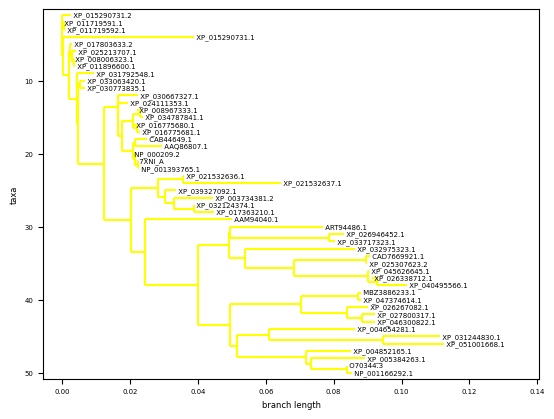

In [16]:
#versão gráfica da árvore
from Bio import Phylo

import matplotlib.pyplot as plt



plt.rc('font', size= 5)          
plt.rc('axes', titlesize=5)    
plt.rc('axes', labelsize=6)    
plt.rc('xtick', labelsize=5)    
plt.rc('ytick', labelsize=5)    
plt.rc('legend', fontsize=5)    
plt.rc('figure', titlesize=13)

alignment = open("BlastpKCNQ1.dnd")
tree = Phylo.read(alignment, 'newick')
tree.ladderize()
Phylo.draw_ascii(tree)

tree = tree.as_phyloxml()
tree.ladderize()
tree.root.color = "yellow"
Phylo.draw(tree)